# Lab 6.4: Regression Diagnostics

**Question 1**

Using the data in https://s3-us-west-2.amazonaws.com/dsci/6002/data/homer.csv :

1) Run a multiple regression model of $y$ against all the $x$ variables and then produce the residuals and fitted values. Create the residual diagnostic plot of residuals on the Y axis against the fitted values on the X axis. 

2) Is the linearity assumption met?  

3) Test for non-Normality.  

4) Test for heteroskedasticity. 

In [1]:
%pylab inline

import pandas as pd
import statsmodels.api as sm
import yaml

from seaborn import pairplot
from sqlalchemy import create_engine

pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

cars = pd.read_sql("SELECT * FROM cars;", engine, index_col='index')

Populating the interactive namespace from numpy and matplotlib


In [2]:
homer_df = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/homer.csv')

In [3]:

homer_df = homer_df.dropna()
homer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6054 entries, 0 to 6056
Data columns (total 7 columns):
y     6054 non-null float64
x1    6054 non-null float64
x2    6054 non-null float64
x3    6054 non-null float64
x4    6054 non-null float64
x5    6054 non-null float64
x6    6054 non-null float64
dtypes: float64(7)
memory usage: 378.4 KB


In [4]:
X1 = homer_df[['x1','x2','x3','x4','x5','x6']]
X1 = sm.add_constant(X1)
y1 = homer_df.y

X1.head()


,const,x1,x2,x3,x4,x5,x6
0,1,-0.023816,-0.012885,0.045936,-0.182890,0.028694,-0.81119
1,1,0.018453,0.058999,-0.072399,0.008679,-0.084344,-0.24208
2,1,0.054999,0.131770,-0.067223,0.202430,0.127060,0.63388
3,1,-0.018933,-0.010875,-0.028255,0.017912,0.084330,0.66062
4,1,-0.000877,0.066941,-0.048190,0.064742,0.147880,0.26643


In [5]:
model1 = sm.OLS(y1,X1)
results1  = model1.fit()

results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     452.1
Date:                Sun, 09 Oct 2016   Prob (F-statistic):               0.00
Time:                        21:26:49   Log-Likelihood:                -8583.7
No. Observations:                6054   AIC:                         1.718e+04
Df Residuals:                    6047   BIC:                         1.723e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0069      0.013     -0.534      0.593        -0.032     0.018
x1             4.0686      0.508      8.015      0.000         3.073     5.064
x2             1.1412      0.257      4.442      0.000         0.638     1.645
x3             4.0318      0.358     11.249      0.000         3.329     4.734
x4             0.9373      0.127      7.362      0.000         0.688     1.187
x5             3.9840      0.171     23.316      0.000         3.649     4.319
x6             0.9967      0.022     44.744      0.000         0.953     1.040
==============================================================================
Omnibus:                      635.831   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.770
Skew:                           0.070   Prob(JB):                     7.54e-41
Kurtosis:                       2.156   Cond. No.                         41.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
import seaborn as sns

>We needed to drop the null values in our dataframe.

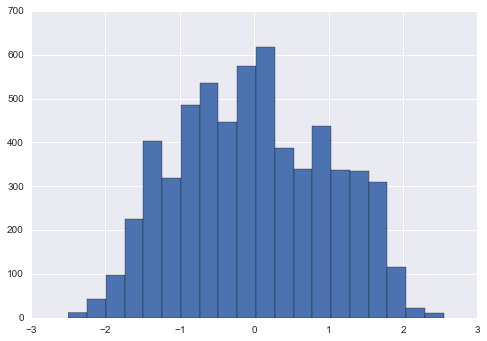

In [7]:
#Histogram of residuals
hist(results1.resid,bins=20);

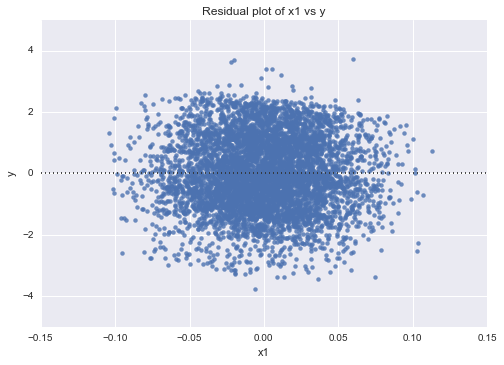

In [8]:
sns.residplot(homer_df.x1,homer_df.y)
plt.title('Residual plot of x1 vs y');

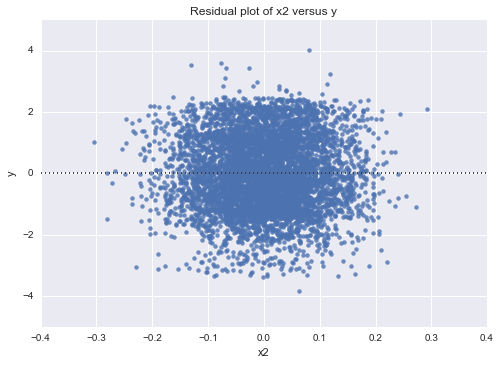

In [9]:
sns.residplot(homer_df.x2,homer_df.y)
plt.title('Residual plot of x2 versus y');

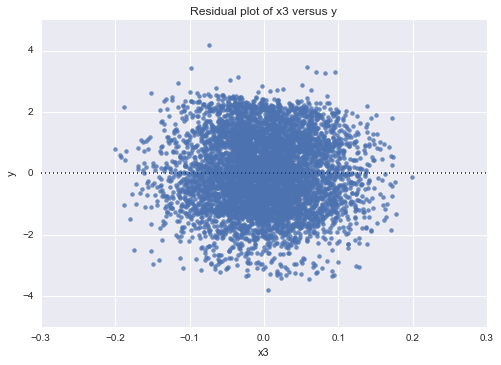

In [10]:
sns.residplot(homer_df.x3,homer_df.y)
plt.title('Residual plot of x3 versus y');

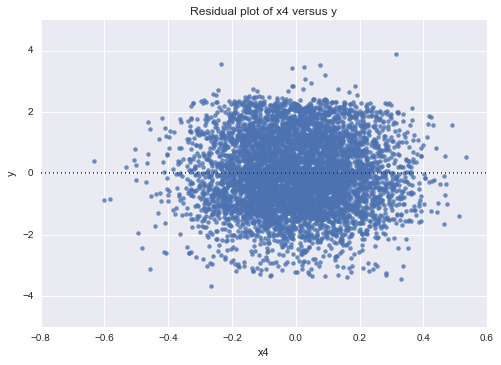

In [11]:
sns.residplot(homer_df.x4,homer_df.y)
plt.title('Residual plot of x4 versus y');

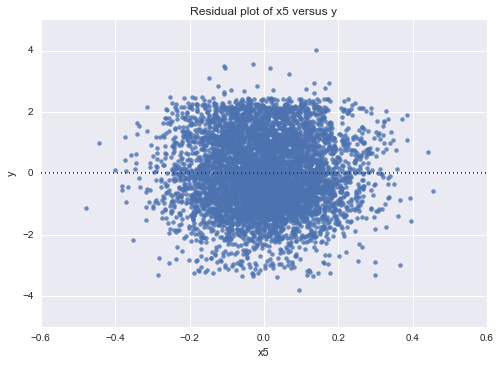

In [12]:
sns.residplot(homer_df.x5,homer_df.y)
plt.title('Residual plot of x5 versus y');

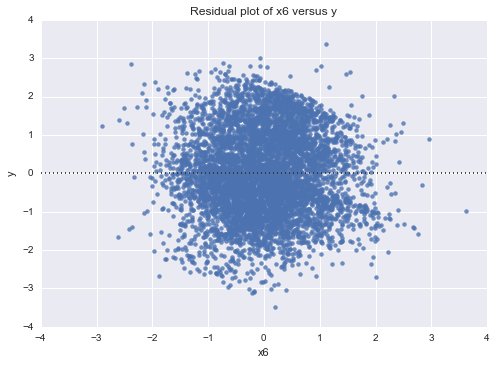

In [13]:
sns.residplot(homer_df.x6,homer_df.y)
plt.title('Residual plot of x6 versus y');

In [14]:
# A list of the fitted values of the model
results1.fittedvalues

0      -0.798871
1      -0.725522
2       1.423993
3       0.800984
4       0.787065
5       0.363420
6       0.998987
7       2.098174
8      -0.513773
9       0.614531
10     -0.614002
11      0.518961
12      0.844610
13      0.671861
14      0.600706
15     -0.006258
16     -0.743079
17     -0.316024
18     -1.431324
19      0.474340
20     -0.855329
21     -0.841259
22     -0.286913
23      0.827355
24     -0.995770
25     -0.514981
26      0.151023
27      0.037038
28     -0.245206
29      0.035460
          ...   
6027   -0.528585
6028    1.521048
6029    0.347421
6030   -0.898063
6031    0.474156
6032    1.296269
6033   -0.385134
6034   -0.528248
6035   -0.711452
6036   -0.060928
6037   -1.561887
6038    0.743434
6039    0.405192
6040   -0.415725
6041    0.063590
6042   -0.909488
6043    0.462796
6044    0.263542
6045   -0.118396
6046   -0.613403
6047    0.785408
6048    0.219294
6049    0.659019
6050   -0.401503
6051   -0.317058
6052   -0.883571
6053   -0.486144
6054    0.8420

In [15]:
# A list of the residuals of the model
results1.resid

0      -1.374729
1      -0.570178
2      -1.278603
3       0.128606
4       0.115525
5       1.624680
6      -1.177117
7      -1.137384
8       0.865713
9      -0.420321
10     -1.016398
11     -0.872471
12      1.229190
13      0.283639
14     -1.330136
15      0.011182
16     -1.348121
17     -0.337286
18     -1.868076
19      0.167090
20     -0.055781
21      0.174909
22      0.366495
23      1.245045
24     -0.556930
25      0.879731
26     -0.220463
27      1.009562
28      1.366506
29     -0.705240
          ...   
6027   -1.234315
6028   -1.327498
6029    1.408679
6030   -0.273437
6031    0.103224
6032   -1.240249
6033   -0.659366
6034   -0.261212
6035   -0.531548
6036    1.482128
6037   -0.504513
6038    0.321466
6039    0.997808
6040   -1.592275
6041    1.485410
6042    0.889449
6043    0.433424
6044    1.484258
6045   -1.130304
6046   -0.632697
6047    1.333992
6048   -0.781334
6049    0.026101
6050   -1.592297
6051   -0.887042
6052    0.789459
6053   -1.003656
6054    0.5016

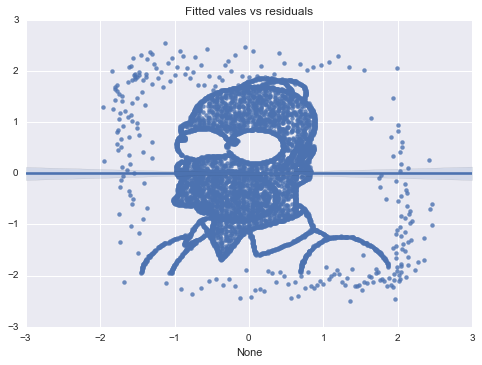

In [16]:
residuals1 = results1.resid_pearson
fitted = results1.fittedvalues

sns.regplot(results1.fittedvalues,results1.resid_pearson)
plt.title('Fitted vales vs residuals');

2) Is the linearity assumption met?

>The linearity assumption is not met because in each residual plot there is a correlation between the residuals and the y -axis. Even though there is a linear relationship between the residuals and the fitted values, there is a visual pattern to the data (Ancombe's quartet).

3) Test for non-Normality.

>To test for normality you can use a Q-Q plot or a histogram of the residuals.

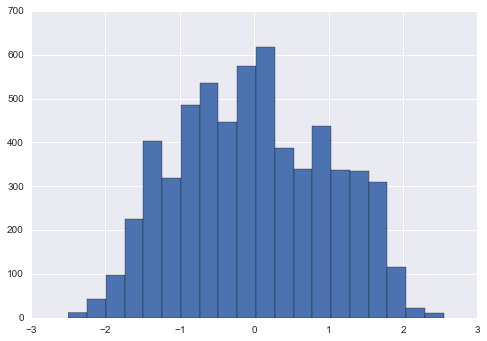

In [17]:
#Histogram of residuals
hist(results1.resid,bins=20);

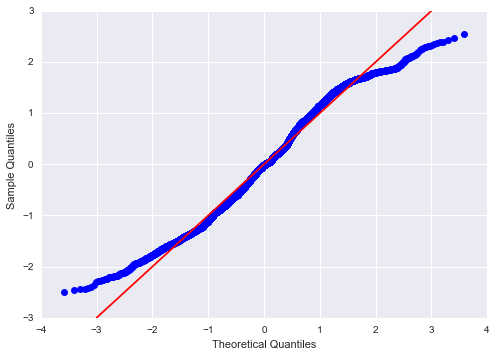

In [18]:
from statsmodels.graphics.gofplots import qqplot

# There are various ways of standardizing the residuals 
# We will use the pearson residuals as the standardized residuals here
sres1 = results1.resid_pearson
qqplot(sres1)
q = linspace(-3, 3)
plot(q, q, color='r');

>It looks there there there is a violation of the normality assumption by looking at the Q-Q plot and the histogram of the residuals. In addition, the Jarque-Bera test has a very low p-value which mean we reject the null that our error terms are normally distributed.

4) Test for heteroskedasticity.

>To test for heteroskedasticity, we can use the Breush-Pagan Lagrange Multiplier test. A small p-value gives evidence for non-constant variance (heteroskedasticity). Our p-value, is  1.0785837820702024e-09 which means we have unequal varaince in our y. 

In [19]:
from statsmodels.stats.diagnostic import het_breushpagan

het_breushpagan(results1.resid, results1.model.exog)

(53.181486415898817,
 1.0785837820702024e-09,
 8.9317939885744408,
 9.8721073719671151e-10)

**Question 2**

You are given data about the Scottish Hill Climb races in the table `hills` which consists of 4 columns:

```
Race:     The name of the race (PK)
Distance: The distance of the race in miles
Climb:    Elevation climbed during race in feet
Time:     Record time for race in minutes
```

1) Explore the data with a scatter matrix and a correlation plot (`statsmodels.graphics.plot_corr`).  

   Build a multiple regression model to predict `Time` based on `Distance` and `Time`.
   

In [20]:
hills_df = pd.read_sql('SELECT * FROM hills ;', engine)

In [21]:
hills_df.describe()

,Distance,Climb,Time
count,35.000000,35.000000,35.000000
mean,7.528571,1815.314286,57.875714
std,5.523936,1619.150536,50.040716
min,2.000000,300.000000,15.950000
25%,4.500000,725.000000,28.000000
50%,6.000000,1000.000000,39.750000
75%,8.000000,2200.000000,68.625000
max,28.000000,7500.000000,204.617000


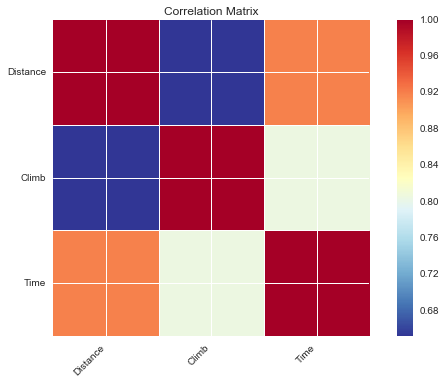

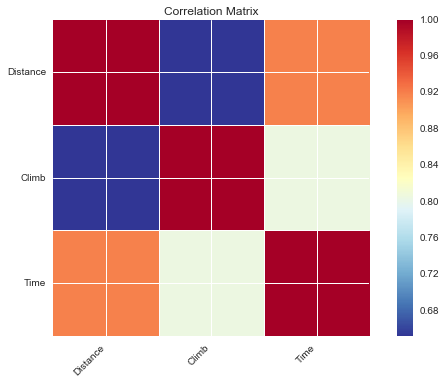

In [22]:
sm.graphics.plot_corr(hills_df.corr(), xnames= ["Distance", "Climb","Time"])

In [23]:
hills_df[['Distance','Climb','Time']].corr()

,Distance,Climb,Time
Distance,1.000000,0.652346,0.919589
Climb,0.652346,1.000000,0.805239
Time,0.919589,0.805239,1.000000


In [24]:
from pandas.tools.plotting import scatter_matrix

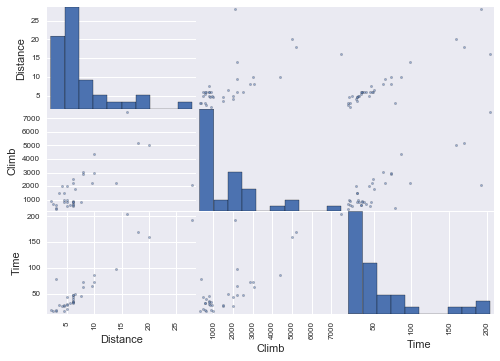

In [25]:
scatter_matrix(hills_df[['Distance','Climb','Time']]);

> With both the correlation plot and the scatter matrix, we can see that there is a strong correlation between time and climb, climb and distance, distance and time. This suggests that these varaibles are multicolinear. 

In [26]:
X2 = hills_df[['Distance','Climb']]
X2 = sm.add_constant(X2)
y2 = hills_df.Time



In [27]:
model2 = sm.OLS(y2,X2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     181.7
Date:                Sun, 09 Oct 2016   Prob (F-statistic):           3.40e-18
Time:                        21:26:59   Log-Likelihood:                -142.11
No. Observations:                  35   AIC:                             290.2
Df Residuals:                      32   BIC:                             294.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -8.9920      4.303     -2.090      0.045       -17.756    -0.228
Distance       6.2180      0.601     10.343      0.000         4.993     7.442
Climb          0.0110      0.002      5.387      0.000         0.007     0.015
==============================================================================
Omnibus:                       47.910   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.976
Skew:                           3.026   Prob(JB):                     1.56e-51
Kurtosis:                      14.127   Cond. No.                     4.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
hills_df[['Distance','Climb','Time']].corr()

,Distance,Climb,Time
Distance,1.000000,0.652346,0.919589
Climb,0.652346,1.000000,0.805239
Time,0.919589,0.805239,1.000000


> Our R^2 value of 91.9% means that 91.9% of the variance in the model is explainer by our independent varaibles. In addition, the p-values for our independent variables are both <.05 (for Distance and Climb) which means that we reject the null hypothesis that their coefficient is zero. 

>However, when we look at the Prob(JB) to determine if our error terms are normally distributed, we see a p-value of 1.56e-51 which means we reject the null that our error terms are normally distributed. 

>To check for linearity of the independent variables, we can look at the residual plots below. For both plots, we see that our residuals do have some extreme points that do not hold with our linearity assumptions. Therefore, we will reject our linearity assumption of our independent variables. We can also see this from the Q-Q plot below. 

>Finally, to check for heteroskedascity (excess variance in our y), we use the Breush-Pagan Lagrange Multiplier test. This p-value is greater than .05, which means we fail to reject the null that our data is not heterskedastic. This means the assumption that our error terms have the same variance.

>To check for multicolinearity, we can use the correlation matrix. There is strong correlation between Climb and Time, greater than .5, and therefore we reject the assumption that our observations are independent of eachother. 

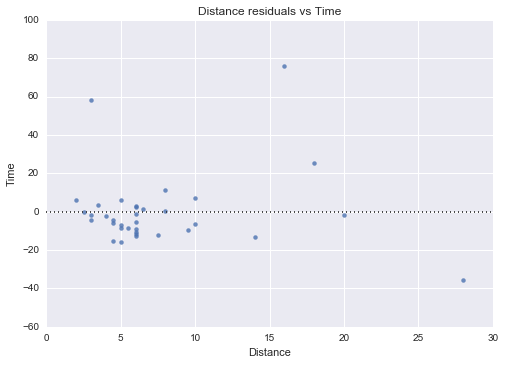

In [29]:
sns.residplot(hills_df.Distance,hills_df.Time)
plt.title('Distance residuals vs Time');

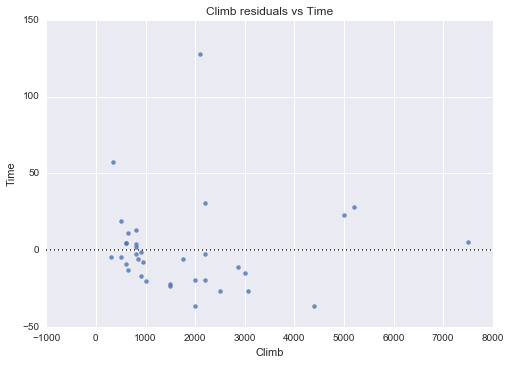

In [30]:
sns.residplot(hills_df.Climb,hills_df.Time)
plt.title('Climb residuals vs Time');

In [31]:
from statsmodels.stats.diagnostic import het_breushpagan

het_breushpagan(results2.resid, results2.model.exog) # the second output gives the p-value of the test

(0.3639464134894832,
 0.83362367560844775,
 0.16812373272512898,
 0.84599098763414304)

2) Interpret the coefficients of your model.  



>The p-values for our independent variables are both <.05 (for Distance and Climb) which means that we reject the null hypothesis that their coefficient is zero. This mean they are significant predictors of time. As Distance and Climb increase by 1 unit each, time increases by 6.21 and 0.01 considering everything else is constant.

# 3) Plot the fitted values of the response (`Time`) against the standardized residuals of the model.

   **Hint:**
   - Use `model.fittedvalues` to get fitted values and `model.resid_pearson` to get the standardized residuals
 
   Does the residual plot appear to fulfill the following assumptions:
   - Linearity
   - Normality
   - Homoscedasticity 
   
   What are the consequences if those assumptions are not met ? 


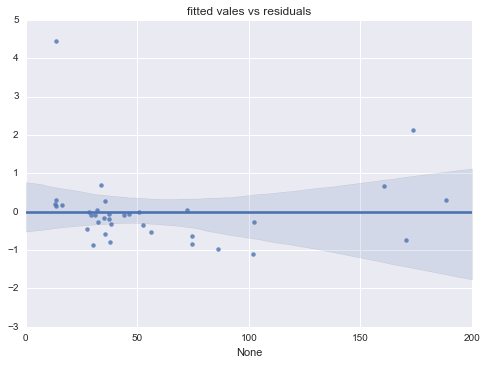

In [32]:
residuals2 = results2.resid_pearson
fitted = results2.fittedvalues

sns.regplot(results2.fittedvalues,results2.resid_pearson)
plt.title('fitted vales vs residuals');

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


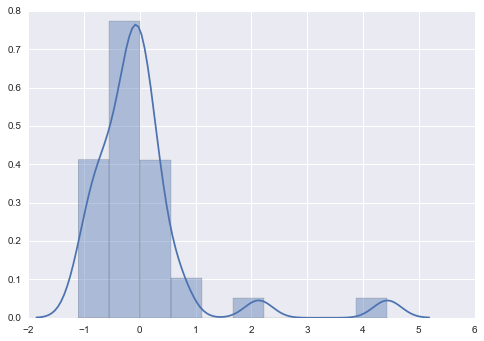

In [33]:
sns.distplot(residuals2 ,bins=10)

### Our data is skewed ro the right.

Linearity
Normality
Homoscedasticity

> Our data does seem to meet the assumption of Linearity in general (with the exception of a couple outlier points). 

> Our data does not seem to meet the assumption of Normality because of the high variance in the error terms. 

> Our  data does not meet he assumption of Homoscedasticiy because of the excess vaiation in the model. 

>Since these assumptions are not met, we can take attempt to transform either our X variable or our Y (using log, 1/x ...etc)

4) An additional test for Normality of the residuals is the Q-Q plot. If the quantiles of the residuals match that of a Normal distribution, then the residuals are normally distribution. 

   Import the qq-plot function from statsmodels `from statsmodels.graphics.gofplots import qqplot`.
   
   Draw a straight line where the quantiles of the residuals are the same as those of a standard Normal distribution.
   
   The plot you produce should look similar to the one below:
   
   ![](images/qq.png)
   
   Do the residuals appear to be Normal ?
  
   

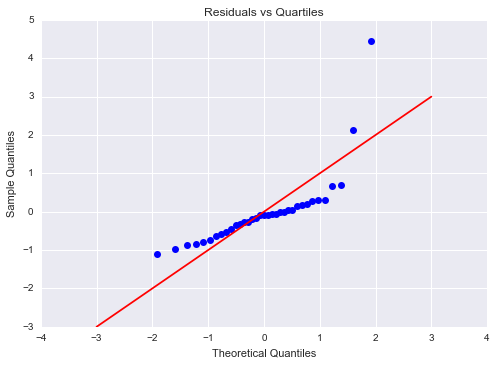

In [34]:
sres2 = results2.resid_pearson
qqplot(sres2)
q = linspace(-3, 3)
plot(q, q, color='r')
plt.title('Residuals vs Quartiles')
show()

>Our plot shows that these residual do NOT appear to be normally distributed.

5) (Extra Credit) To identify outliers, one can also look at the leverage-residual plot. 

   Explain what leverage means and how is leverage computed. Is a data point influential if the residual is large but the leverage is low? What about if the residual and leverage are both high?
   
   Import the leverage-residual plot from statsmodels by `from statsmodels.graphics.regressionplots import plot_leverage_resid2`. You can call it by just feeding in the fitted model.
   
   ```python
   plot_leverage_resid2(model)
   ```
   
   Identify the races where the leverage and residual are high. Comment on the commonalities between those races.
   
   

>Leverage point: an observation with an unusual X value. The leverage point is calculated using the i-th diagonal element of the projection matrix$ {\displaystyle \mathbf {H} =\mathbf {X} \left(\mathbf {X} ^{\mathsf {T}}\mathbf {X} \right)^{-1}\mathbf {X} ^{\mathsf {T}}} {\displaystyle \mathbf {H} =\mathbf {X} \left(\mathbf {X} ^{\mathsf {T}}\mathbf {X} \right)^{-1}\mathbf {X} ^{\mathsf {T}}}, where {\displaystyle \mathbf {X} } \mathbf {X} $ is the design matrix.The leverage score is also known as the observation self-sensitivity or self-influence,[2] a

>https://en.wikipedia.org/wiki/Leverage_(statistics)

>Residual is calculated by taking the predicted value minues the expected value.

>Cases that are both large residuals and high leverage have a large impact on both the slopes and intercept of the model.

>If the residual is large but leverage low, then the data point is influential (because the predicted value is far from the actual value).




In [35]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

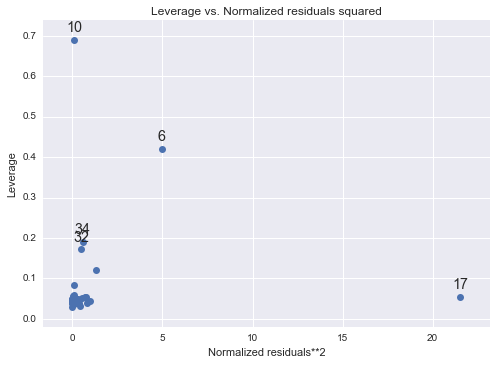

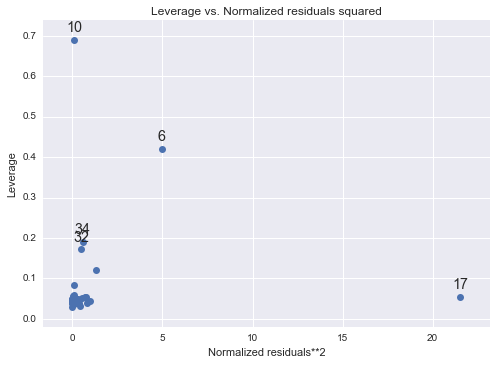

In [36]:
plot_leverage_resid2(results2)

> Leverage and residuals are high at points 17 and 6. 

6) (Extra Credit) What are the precautions you need to bare in mind if you were to remove the outliers you have identified in `5.` ?
   
   Remove the outliers in the dataset and re-run the model. 
   
   Plot the residual plot and Q-Q plot as you have done previously. Comment on the plots.
   
   Also comment on the fit of the model to the data relative to the first model.

**Question 3**

You are given the price and features of some used cars in the tables `car_price` and `car_type`. Car company X want you to build a model to predict car price based on some given features about the car.

1) Explore the dataset with a correlation matrix. You should select only numeric columns when you are constructing the correlation matrix.  
   ```python
   numerics_only = car_price.select_dtypes(['int64', 'float64'])
   sm.graphics.plot_corr(numerics_only.corr(), xnames=numerics_only.columns.tolist())
   ```

   Which 2 variables are strongly multicollinear with each other based on your observation of the correlation matrix ?
   
   Which one would you choose to put in the model and why (subjective answer).

In [37]:
car_price_df = pd.read_sql('SELECT * from car_price;',engine)
car_type_df = pd.read_sql('SELECT * FROM car_type;',engine)
total_car = pd.read_sql('SELECT car_type.make,car_type.model,car_type.trim,car_type.type ,car_type.cylinder,\
                        car_type.liter,car_type.doors, car_price.price, car_price.mileage, car_price.cruise, car_price.sound, car_price.leather FROM car_type \
                        JOIN car_price ON car_type.model = car_price.model AND \
                        car_type.trim = car_price.trim AND car_type.make = car_price.make AND \
                         car_type.trim = car_price.trim;',engine)

In [38]:
car_type_df.head()

,make,model,trim,type,cylinder,liter,doors
0,Buick,Century,Sedan 4D,Sedan,6,3.1,4
1,Buick,Lacrosse,CX Sedan 4D,Sedan,6,3.6,4
2,Buick,Lacrosse,CXL Sedan 4D,Sedan,6,3.6,4
3,Buick,Lacrosse,CXS Sedan 4D,Sedan,6,3.8,4
4,Buick,Lesabre,Custom Sedan 4D,Sedan,6,3.8,4


In [39]:
car_price_df.head()

,car_id,price,mileage,make,model,trim,cruise,sound,leather
0,0,17314.103129,8221,Buick,Century,Sedan 4D,1,1,1
1,1,17542.036083,9135,Buick,Century,Sedan 4D,1,1,0
2,2,16218.847862,13196,Buick,Century,Sedan 4D,1,1,0
3,3,16336.913140,16342,Buick,Century,Sedan 4D,1,0,0
4,4,16339.170324,19832,Buick,Century,Sedan 4D,1,0,1


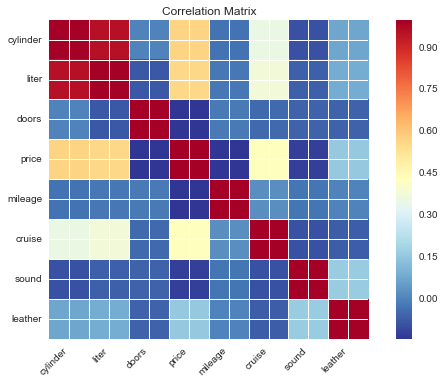

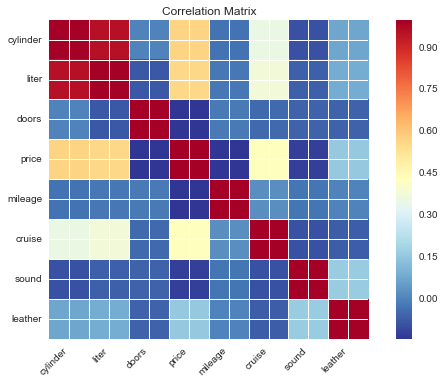

In [40]:
numerics_only = total_car.select_dtypes(['int64', 'float64'])
sm.graphics.plot_corr(numerics_only.corr(), xnames=numerics_only.columns.tolist())



> The two variables that are strongly multicolinear (strong correlation to eachother) are liter and cylinder and price.

> I would choose to include liter in the model because it appears to have a lower correlation with other variables compared to cylinder.


In [41]:
total_car.columns

Index(['make', 'model', 'trim', 'type', 'cylinder', 'liter', 'doors', 'price',
       'mileage', 'cruise', 'sound', 'leather'],
      dtype='object')

2) Fit a multiple regression model with all the available features to predict price. Check all the assumptions made about the model as you have done previously. Comment on the Q-Q plot and the residual plot.

   

>We can only include numeric data in our multiple linear regression model.

In [42]:
X3=total_car[['cylinder','liter','doors','mileage','cruise','sound','leather']]
X3 = sm.add_constant(X3)
y3 = total_car.price

model4 = sm.OLS(y3,X3)
results4 = model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     91.64
Date:                Sun, 09 Oct 2016   Prob (F-statistic):           8.80e-98
Time:                        21:27:04   Log-Likelihood:                -8298.5
No. Observations:                 804   AIC:                         1.661e+04
Df Residuals:                     796   BIC:                         1.665e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       6758.7551   1876.967      3.601      0.000      3074.365  1.04e+04
cylinder    3792.3789    683.180      5.551      0.000      2451.332  5133.426
liter       -787.2207    867.062     -0.908      0.364     -2489.218   914.777
doors      -1542.7458    320.456     -4.814      0.000     -2171.784  -913.708
mileage       -0.1697      0.032     -5.326      0.000        -0.232    -0.107
cruise      6288.9971    657.992      9.558      0.000      4997.392  7580.602
sound      -1993.7953    571.776     -3.487      0.001     -3116.162  -871.429
leather     3349.3616    597.681      5.604      0.000      2176.144  4522.579
==============================================================================
Omnibus:                      135.077   Durbin-Watson:                   0.311
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.476
Skew:                           1.054   Prob(JB):                     6.63e-50
Kurtosis:                       4.523   Cond. No.                     1.61e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The R^2 of our model is 44.6%, which means that 44.6% of the variance of our model is explained by our independent variables.

> To evaluate our model, we will look at the following.

- 1) Linearity:  y  is a linear function of  x 

- 2) Normality: the errors ( ε ) are Normally distributed

- 3) Constant variance: the errors have the same variance

- 4) Independent observations: the observations are independent of each other

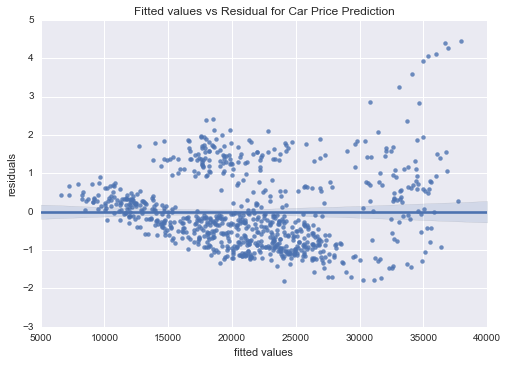

In [43]:
sns.regplot(results4.fittedvalues,results4.resid_pearson)
plt.title('Fitted values vs Residual for Car Price Prediction')
plt.ylabel('residuals')
plt.xlabel('fitted values');

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


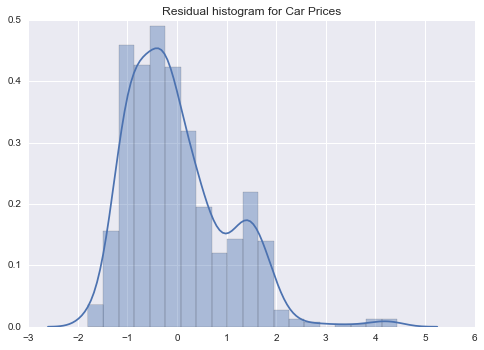

In [44]:
sns.distplot(results4.resid_pearson,bins=20)
plt.title('Residual histogram for Car Prices');

In [45]:
total_car[['cylinder','liter','doors','mileage','cruise','sound','leather']].corr()

,cylinder,liter,doors,mileage,cruise,sound,leather
cylinder,1.000000,0.957897,0.002206,-0.029461,0.354285,-0.089704,0.075520
liter,0.957897,1.000000,-0.079259,-0.018641,0.377509,-0.065527,0.087332
doors,0.002206,-0.079259,1.000000,-0.016944,-0.047674,-0.062530,-0.061969
mileage,-0.029461,-0.018641,-0.016944,1.000000,0.025037,-0.026146,0.001005
cruise,0.354285,0.377509,-0.047674,0.025037,1.000000,-0.091730,-0.070573
sound,-0.089704,-0.065527,-0.062530,-0.026146,-0.091730,1.000000,0.165444
leather,0.075520,0.087332,-0.061969,0.001005,-0.070573,0.165444,1.000000


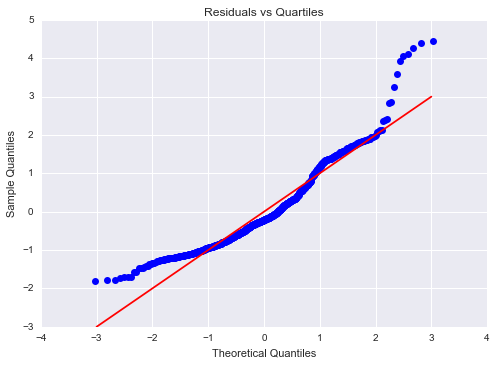

In [46]:
sres3 = results4.resid_pearson
qqplot(sres3)
q = linspace(-3, 3)
plot(q, q, color='r')
plt.title('Residuals vs Quartiles')
show()

In [47]:


het_breushpagan(results4.resid, results4.model.exog)

(177.05806037023399,
 8.1426571616755039e-35,
 32.114665796402086,
 2.260817271293845e-39)

>1) Linearity. In the residual plot below, we see that our residuals do have a linear relationship (in general) with our predicted values. Therefore, this assumption does not hold.

>2)Normality. In the histogram plot of the residuals we can see that our residuals are NOT normally distributed. Therefore, we reject this assumption. The JQ test has a p-value below .05 which means we reject the null that our variables are normally distributed.

>3)Constant variance. In the residual plot below, there are more residuals above 0 than below 0 for fitted values between 20000 and 50000. Therefore, we reject this assumption. In addition, the het_breushpagan test has a p-value below .05,8.1426571616755039e-35, so we reject the null that we have constant varaince.

> 4) To check for multicolinearity, use the a correlation matrix on our independent varaibles. As a general rule, any varaibles that are correlation greater than .5 means this assumption is violated. For this model, this assumption is violated for cylinder and liters.

> The Q-Q plot confirms that our data is not normally distributed.

# 3) One of the remedies to heteroskedastic residuals is to take the log of the response. Log the response and re-run the model and check the assumptions again.

   

In [48]:


X4=total_car[['cylinder','liter','doors','mileage','cruise','sound','leather']]
X4 = sm.add_constant(X4)
y4 = total_car.price

log_y4 = np.log(y4)

model5 = sm.OLS(log_y4,X4)
results5 = model5.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     107.6
Date:                Sun, 09 Oct 2016   Prob (F-statistic):          1.18e-110
Time:                        21:27:05   Log-Likelihood:                -155.94
No. Observations:                 804   AIC:                             327.9
Df Residuals:                     796   BIC:                             365.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          9.2507      0.075    123.331      0.000         9.103     9.398
cylinder       0.0774      0.027      2.834      0.005         0.024     0.131
liter          0.0702      0.035      2.027      0.043         0.002     0.138
doors         -0.0300      0.013     -2.346      0.019        -0.055    -0.005
mileage    -7.451e-06   1.27e-06     -5.849      0.000     -9.95e-06 -4.95e-06
cruise         0.3134      0.026     11.918      0.000         0.262     0.365
sound         -0.0899      0.023     -3.936      0.000        -0.135    -0.045
leather        0.1194      0.024      5.001      0.000         0.073     0.166
==============================================================================
Omnibus:                       47.642   Durbin-Watson:                   0.367
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.965
Skew:                           0.554   Prob(JB):                     3.84e-11
Kurtosis:                       2.550   Cond. No.                     1.61e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> After we take the log our of response (price), the R^2 our of model increases to 48.6% and adjusted R^2 to 48.3% (from 44.6%). 

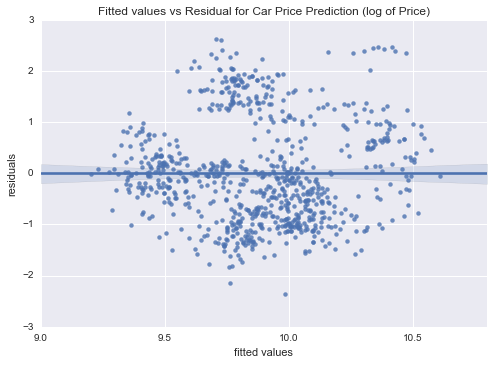

In [49]:
sns.regplot(results5.fittedvalues,results5.resid_pearson)
plt.title('Fitted values vs Residual for Car Price Prediction (log of Price)')
plt.ylabel('residuals')
plt.xlabel('fitted values');

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


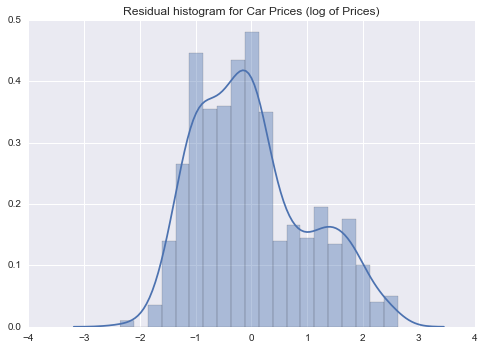

In [50]:
sns.distplot(results5.resid_pearson,bins=20)
plt.title('Residual histogram for Car Prices (log of Prices)');

In [51]:
from statsmodels.stats.diagnostic import het_breushpagan

het_breushpagan(results5.resid, results5.model.exog)

(314.22355985888333,
 5.5346216259241452e-64,
 72.955137763788386,
 1.9694664919159542e-81)

In [52]:
total_car[['cylinder','liter','doors','mileage','cruise','sound','leather']].corr()

,cylinder,liter,doors,mileage,cruise,sound,leather
cylinder,1.000000,0.957897,0.002206,-0.029461,0.354285,-0.089704,0.075520
liter,0.957897,1.000000,-0.079259,-0.018641,0.377509,-0.065527,0.087332
doors,0.002206,-0.079259,1.000000,-0.016944,-0.047674,-0.062530,-0.061969
mileage,-0.029461,-0.018641,-0.016944,1.000000,0.025037,-0.026146,0.001005
cruise,0.354285,0.377509,-0.047674,0.025037,1.000000,-0.091730,-0.070573
sound,-0.089704,-0.065527,-0.062530,-0.026146,-0.091730,1.000000,0.165444
leather,0.075520,0.087332,-0.061969,0.001005,-0.070573,0.165444,1.000000


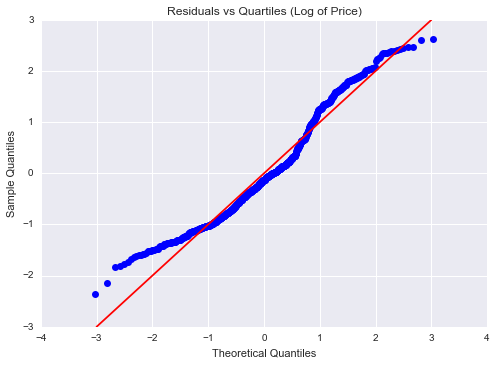

In [53]:
sres3 = results5.resid_pearson
qqplot(sres3)
q = linspace(-3, 3)
plot(q, q, color='r')
plt.title('Residuals vs Quartiles (Log of Price)')
show()

>1) Linearity. In the residual plot below, we see that our residuals do have a linear relationship (in general) with our predicted values. Therefore, this assumption holds.

>2)2)Normality. In the histogram plot of the residuals we can see that our residuals are NOT normally distributed. Therefore, we reject this assumption. The JQ test has a p-value below .05 which means we reject the null that our variables are normally distributed.

>3)Constant variance. After conducting the het_breushpagan test, the p-value is below .05 (5.5346216259241452e-64) which means we have non-constant variance or heteroskedascity. We reject this assumption.

> 4) To check for multicolinearity, use the a correlation matrix on our independent varaibles. As a general rule, any varaibles that are correlation greater than .5 means this assumption is violated. For this model, this assumption does not hold because cylinder and liter are highly correlated.

> The Q-Q plot confirms that our data is  not normally distributed (Although, it is an improvement).

4) As a rule of thumb, the fewer variables there are in a model, the easier it is to interpret the model. Use your judgement and remove features which you think are of little practical importance and have coefficients that are statistically insignificant.

   

> I will remove liter (due to the high correlation with cylinder). 

In [54]:
X6=total_car[['cylinder','doors','mileage','cruise','sound','leather']]
X6 = sm.add_constant(X6)
y6 = car_price_df.price

model6 = sm.OLS(y6,X6)
results6 = model6.fit()
results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     106.8
Date:                Sun, 09 Oct 2016   Prob (F-statistic):           1.23e-98
Time:                        21:27:06   Log-Likelihood:                -8298.9
No. Observations:                 804   AIC:                         1.661e+04
Df Residuals:                     797   BIC:                         1.664e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       7323.1643   1770.837      4.135      0.000      3847.109  1.08e+04
cylinder    3200.1246    202.983     15.765      0.000      2801.680  3598.570
doors      -1463.3991    308.274     -4.747      0.000     -2068.525  -858.273
mileage       -0.1705      0.032     -5.352      0.000        -0.233    -0.108
cruise      6205.5113    651.463      9.525      0.000      4926.724  7484.298
sound      -2024.4007    570.718     -3.547      0.000     -3144.689  -904.112
leather     3327.1433    597.114      5.572      0.000      2155.041  4499.246
==============================================================================
Omnibus:                      145.941   Durbin-Watson:                   0.305
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.863
Skew:                           1.098   Prob(JB):                     6.15e-57
Kurtosis:                       4.703   Cond. No.                     1.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>When we remove liter, our overall R^2 decreases from 48% to 44% and our adjusted R^2 decreases from 48.2% to 44.2% . Even though our R^2 went down, this might be a better model because it is simplier (fewer variables).

5) (Extra Credit) Run outlier diagnostics in order to identify and explain outliers of the model.

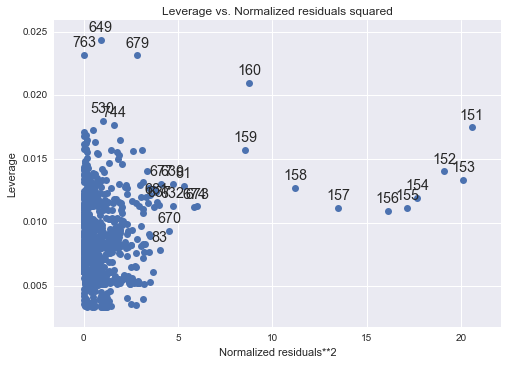

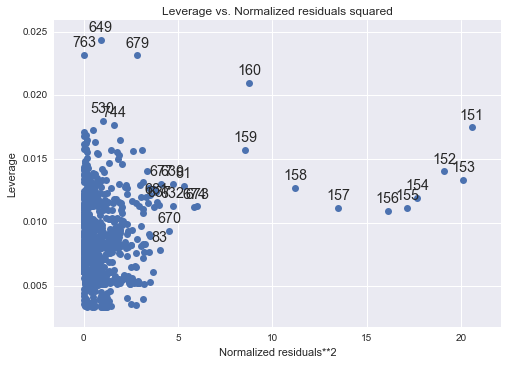

In [55]:
plot_leverage_resid2(results6)

In [56]:
total_car.iloc[151]

make               Cadillac
model                XLR-V8
trim        Hardtop Conv 2D
type            Convertible
cylinder                  8
liter                   4.6
doors                     2
price               70755.5
mileage                 583
cruise                    1
sound                     1
leather                   1
Name: 151, dtype: object

In [57]:
total_car.iloc[160]

make               Cadillac
model                XLR-V8
trim        Hardtop Conv 2D
type            Convertible
cylinder                  8
liter                   4.6
doors                     2
price                 52002
mileage               42691
cruise                    1
sound                     1
leather                   1
Name: 160, dtype: object

In [58]:
total_car.iloc[679]

make               SAAB
model            9_3 HO
trim        Arc Conv 2D
type        Convertible
cylinder              4
liter                 2
doors                 2
price             28778
mileage           48991
cruise                1
sound                 1
leather               1
Name: 679, dtype: object

# The outliers in this model are cars that are at the extremes of our distribution. Each point corresponds to to a car with features that are outside the normal. For example, row 151 corresponds to a Cadillac with only 583 miles (near the absolute min for the data set) and a price of 70,755 (near the max of our data set). Above, there are some additional rows with features near the end of the distribution for our data set.

In [59]:
total_car.describe()

,cylinder,liter,doors,price,mileage,cruise,sound,leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,5.268657,3.037313,3.527363,21343.143767,19831.934080,0.752488,0.679104,0.723881
std,1.387531,1.105562,0.850169,9884.852801,8196.319707,0.431836,0.467111,0.447355
min,4.000000,1.600000,2.000000,8638.930895,266.000000,0.000000,0.000000,0.000000
25%,4.000000,2.200000,4.000000,14273.073870,14623.500000,1.000000,0.000000,0.000000
50%,6.000000,2.800000,4.000000,18024.995019,20913.500000,1.000000,1.000000,1.000000
75%,6.000000,3.800000,4.000000,26717.316636,25213.000000,1.000000,1.000000,1.000000
max,8.000000,6.000000,4.000000,70755.466717,50387.000000,1.000000,1.000000,1.000000
